# Librería

In [150]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Datos

In [151]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

# Primera Exploración

In [152]:
df = data.copy()

In [153]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [154]:
df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [156]:
df.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [157]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [158]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rowid,344.0,NaN,NaN,NaN,172.5,99.448479,1.0,86.75,172.5,258.25,344.0
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,333,2,male,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,344.0,NaN,NaN,NaN,2008.02907,0.818356,2007.0,2007.0,2008.0,2009.0,2009.0


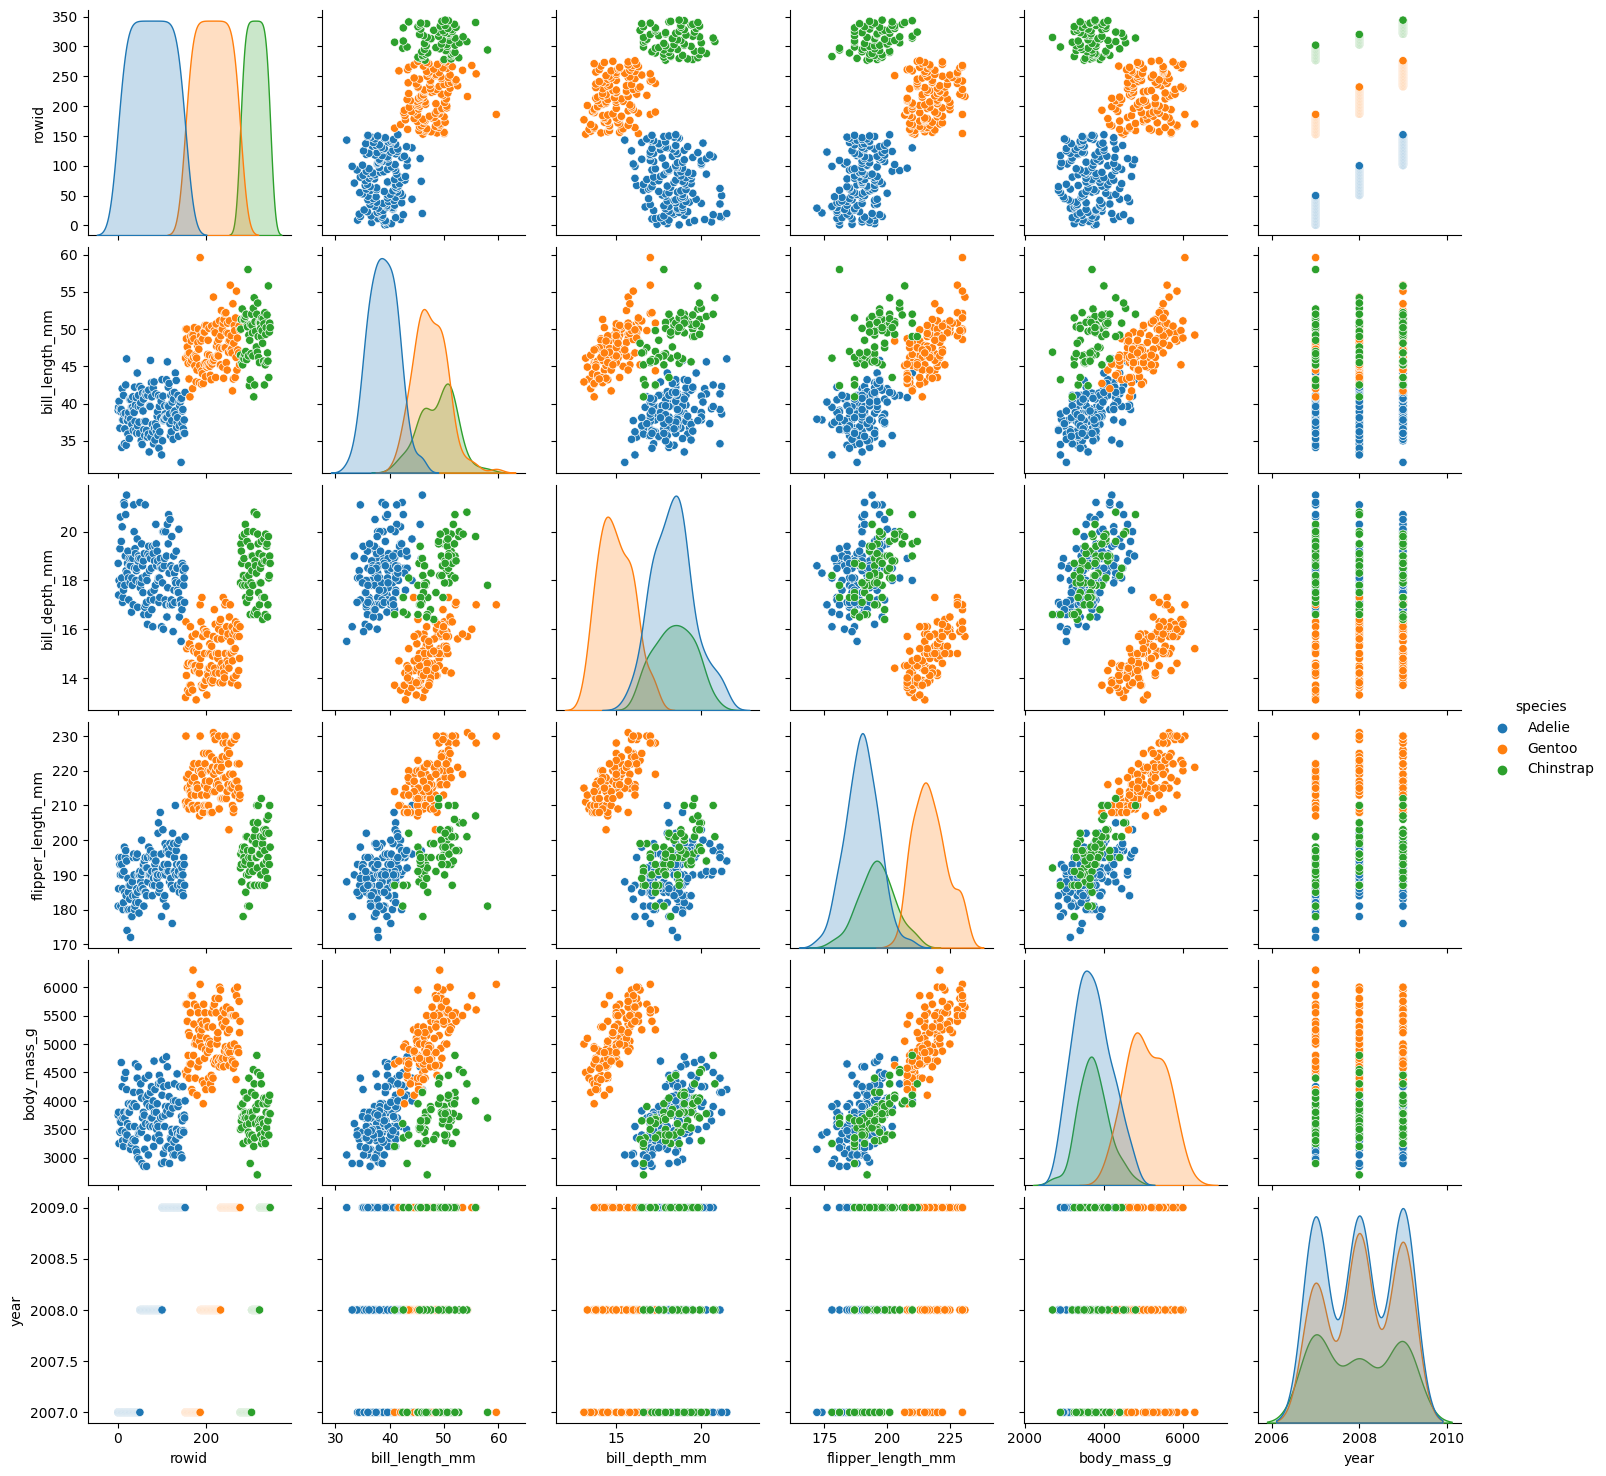

In [159]:
sns.pairplot(df, hue='species')

# Mini-EDA

In [160]:
df.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<Axes: >

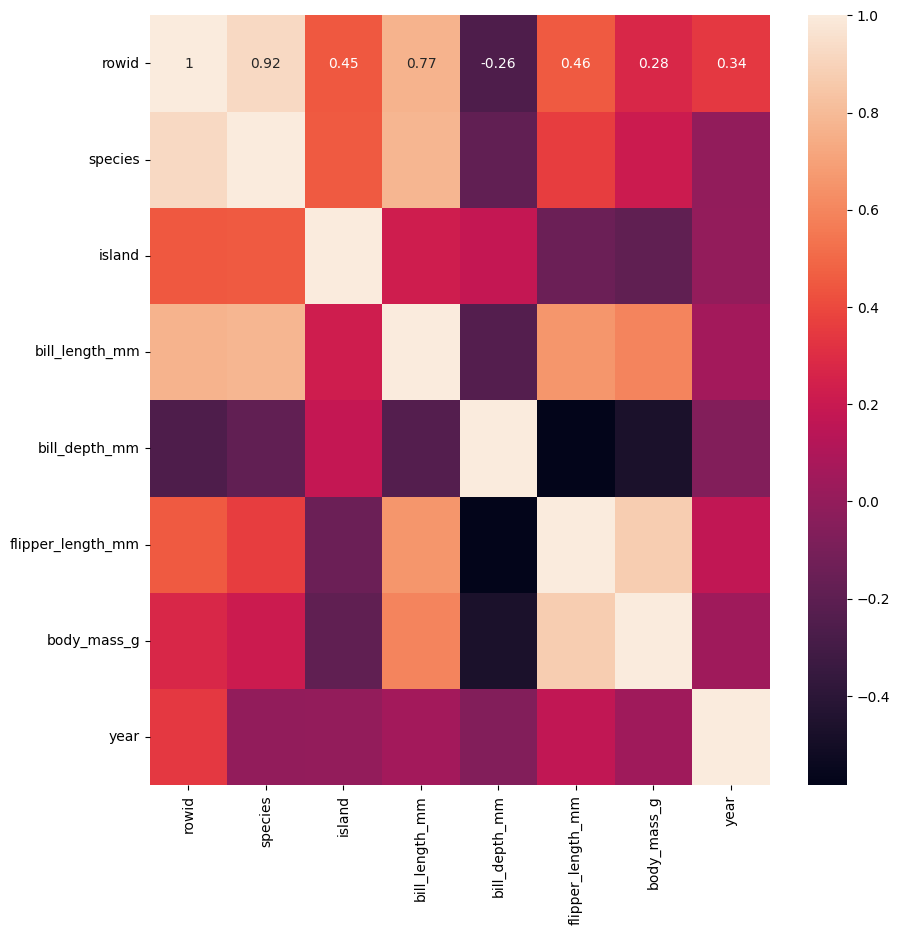

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(df.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2,'Torgersen':0, 'Biscoe':1, 'Dream':2}).corr(numeric_only=True), annot=True)

<Axes: xlabel='species', ylabel='count'>

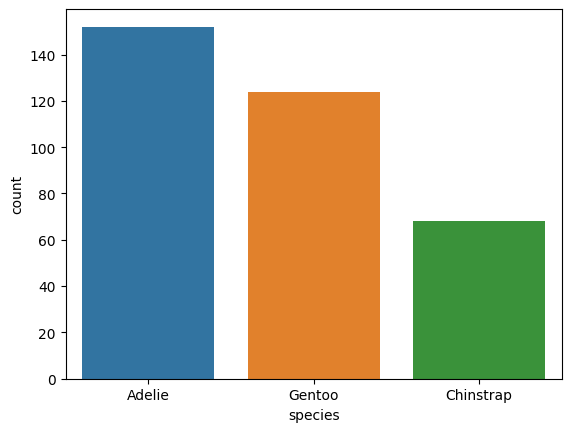

In [162]:
sns.countplot(x='species', data=df)

In [163]:
df['species'].value_counts()/len(df.species)

species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: count, dtype: float64

<Axes: xlabel='island', ylabel='count'>

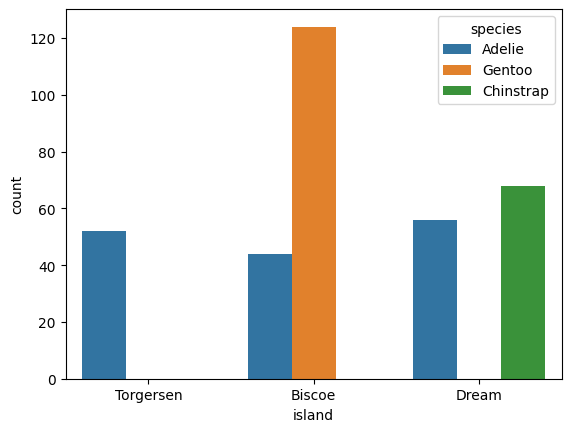

In [164]:
sns.countplot(x='island',hue='species', data=df)

# Tratamiento de datos

In [165]:
df[df.isna().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [166]:
df_1 = df.dropna()
df_1['species'].value_counts()/len(df_1.species)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: count, dtype: float64

In [167]:
df_2 = df.copy()
df_2['bill_length_mm'].fillna(df_2['bill_length_mm'].mean(), inplace=True)
df_2['bill_depth_mm'].fillna(df_2['bill_depth_mm'].mean(), inplace=True)
df_2['flipper_length_mm'].fillna(df_2['flipper_length_mm'].median(), inplace=True)
df_2['body_mass_g'].fillna(df_2['body_mass_g'].median(), inplace=True)
df_2['sex'].fillna(df_2['sex'].mode()[0], inplace=True)
df_2.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [168]:
from scipy.spatial.distance import euclidean

df_3 = df.copy()

df_3.dropna(thresh=5, inplace=True)

datos_imp = df.groupby(['species','sex','island'])[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'bill_length_mm':'mean','bill_depth_mm':'mean','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()
datos_imp


def impute_sex(row):
    if pd.isna(row['sex']):
        filas_relevantes = datos_imp[(datos_imp['species'] == row['species']) & (datos_imp['island'] == row['island'])]
        min_distancia = float('inf')
        sex_a_imputar = None

        for _, r_row in filas_relevantes.iterrows():
            distancia = euclidean(row[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(0),
                                 r_row[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
            if distancia < min_distancia:
                min_distancia = distancia
                sex_a_imputar = r_row['sex']
        
        return sex_a_imputar
    else:
        return row['sex']
    
df_3['sex'] = df_3.apply(impute_sex, axis=1)

df_3[df_3.isna().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


# División de datos

In [169]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop('species',axis=1), df_1['species'], test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2.drop('species',axis=1), df_2['species'], test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_3.drop('species',axis=1), df_3['species'], test_size=0.2, random_state=42)

# Escalado

In [170]:
# hacer un OHE a isla y sexo
col_ohe = ["sex"]
#Hacer mapeo con specie
# hacer escalado con el resto de valores
col_std = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

### Mapeo de species

In [171]:
y_train_1 = y_train_1.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
y_val_1 = y_test_1.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})

# X_train_spc_2 = X_train_2.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
# X_val_spc_2 = X_train_2.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})

# X_train_spc_3 = X_train_3.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
# X_val_spc_3 = X_train_3.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})

### Label encoder

In [172]:
le = LabelEncoder()

X_train_1 = X_train_1.drop(columns='rowid', axis=1)
X_test_1 = X_test_1.drop(columns='rowid', axis=1)


X_train_1['island'] = le.fit_transform(X_train_1['island'])
X_test_1['island'] = le.transform(X_test_1['island'])


### Escalado

In [189]:
X_train_1

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
232,0,49.1,14.5,212.0,4625.0,female,2009
84,1,37.3,17.8,191.0,3350.0,female,2008
306,1,40.9,16.6,187.0,3200.0,female,2008
22,0,35.9,19.2,189.0,3800.0,female,2007
29,0,40.5,18.9,180.0,3950.0,male,2007
...,...,...,...,...,...,...,...
195,0,49.6,15.0,216.0,4750.0,male,2008
77,2,37.2,19.4,184.0,3900.0,male,2008
112,0,39.7,17.7,193.0,3200.0,female,2009
281,1,45.2,17.8,198.0,3950.0,female,2007


In [195]:
sca = StandardScaler()

X_train_sca_1 = pd.DataFrame(sca.fit_transform(X_train_1[col_std]), columns=col_std, index=X_train_1.index)
X_val_sca_1 = pd.DataFrame(sca.transform(X_test_1[col_std]), columns=col_std, index=X_test_1.index)

X_train_sca_1['island'] = X_train_1['island']
X_val_sca_1['island'] = X_test_1['island']

# X_train_sca_2 = pd.DataFrame(sca.fit_transform(X_train_spc_2[col_std]), columns=col_std, index=X_train_2.index)
# X_val_sca_2 = pd.DataFrame(sca.transform(X_val_spc_2[col_std]), columns=col_std, index=X_val_2.index)

# X_train_sca_3 = pd.DataFrame(sca.fit_transform(X_train_spc_3[col_std]), columns=col_std, index=X_train_3.index)
# X_val_sca_3 = pd.DataFrame(sca.transform(X_val_spc_3[col_std]), columns=col_std, index=X_val_3.index)

### One hot encoder

In [197]:
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')

transformed_X_train = OHE.fit_transform(X_train_1[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train_1.index)
X_train_sca_ohe_1 = pd.concat([X_train_sca_1, transformed_df], axis=1)

transformed_X_val = OHE.transform(X_test_1[col_ohe])
transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_test_1.index)
X_val_sca_ohe_1 = pd.concat([X_val_sca_1, transformed_df], axis=1)

# transformed_X_train = OHE.fit_transform(X_train_2[col_ohe])
# transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train_2.index)
# X_train_sca_ohe_2 = pd.concat([X_train_sca_2, transformed_df], axis=1)

# transformed_X_val = OHE.transform(X_val_2[col_ohe])
# transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_val_2.index)
# X_val_sca_ohe_2 = pd.concat([X_val_sca_2, transformed_df], axis=1)

# transformed_X_train = OHE.fit_transform(X_train_3[col_ohe])
# transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train_3.index)
# X_train_sca_ohe_3 = pd.concat([X_train_sca_3, transformed_df], axis=1)

# transformed_X_val = OHE.transform(X_val_3[col_ohe])
# transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_val_3.index)
# X_val_sca_ohe_3 = pd.concat([X_val_sca_3, transformed_df], axis=1)

In [199]:
X_train_sca_ohe_1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex_female,sex_male
232,0.928042,-1.308932,0.743575,0.484684,0,1.0,0.0
84,-1.253118,0.370128,-0.730905,-1.090219,1,1.0,0.0
306,-0.587679,-0.240439,-1.011758,-1.275502,1,1.0,0.0
22,-1.511899,1.082456,-0.871332,-0.534371,0,1.0,0.0
29,-0.661617,0.929814,-1.503252,-0.349088,0,0.0,1.0
...,...,...,...,...,...,...,...
195,1.020464,-1.054529,1.024428,0.639086,0,0.0,1.0
77,-1.271602,1.184217,-1.222398,-0.410849,2,0.0,1.0
112,-0.809492,0.319247,-0.590478,-1.275502,0,1.0,0.0
281,0.207150,0.370128,-0.239412,-0.349088,1,1.0,0.0


# BaseLines y Selección de modelo

In [227]:
lg_rg = LogisticRegression(max_iter=10000)
lg_rg.fit(X_train_sca_ohe_1, y_train_1)
predicc = lg_rg.predict(X_val_sca_ohe_1)


In [228]:
print(classification_report(y_val_1, predicc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [211]:
svc_fit = SVC(max_iter=10000)
svc_fit.fit(X_train_sca_ohe_1, y_train_1)

SVC(max_iter=10000)

# Predicción

In [202]:
predicc = lg_rg.predict(X_val_sca_ohe_1)
predicc

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0], dtype=int64)

In [212]:
predicc2 = svc_fit.predict(X_val_sca_ohe_1)
predicc2

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0], dtype=int64)

# Validad mi modelo

In [205]:
accuracy_score(y_val_1,predicc)


1.0

In [206]:
confusion_matrix(y_val_1,predicc)

array([[31,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]], dtype=int64)

In [209]:
cv_score = cross_val_score(lg_rg, X_val_sca_ohe_1, y_test_1, cv=5)

In [210]:
np.mean(cv_score)

0.9703296703296704

In [213]:
accuracy_score(y_val_1,predicc2)

1.0

In [214]:
confusion_matrix(y_val_1,predicc2)

array([[31,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]], dtype=int64)

In [215]:
cv_score = cross_val_score(svc_fit, X_val_sca_ohe_1, y_test_1, cv=5)

In [216]:
np.mean(cv_score)

0.9703296703296704